# Предобработка датасета

1. Создадим столбец с типами населённых пунктов 'type_town'.
2. Создадим столбец с названиями населённых пунктов, очищенными от типов 'clear_name'.

In [1]:
import pandas as pd
import gdown           

In [2]:
url = 'https://drive.google.com/file/d/1j4abhCEAJldxCtptJAIFNFZHlrjUkAxE/view?usp=sharing'
output_path = 'Russian_ds.tsv'
gdown.download(url, output_path, quiet=False, fuzzy=True)
df = pd.read_csv(output_path, sep='\t')

Downloading...
From: https://drive.google.com/uc?id=1j4abhCEAJldxCtptJAIFNFZHlrjUkAxE
To: C:\Users\potkd\jupyter\my_projects\Russian_ds.tsv
100%|█████████████████████████████████████████████████████████████████████████████| 31.2M/31.2M [00:02<00:00, 11.9MB/s]


In [3]:
df

,name,other_name,region_name,district,lon,lat,population,approx
0,город Михайловка,NaN,Волгоградская область,городской округ Город Михайловка,43.239730,50.070850,58407.0,0.0
1,посёлок Сибирский,NaN,Алтайский край,городской округ Посёлок Сибирский,83.839377,53.557357,11807.0,0.0
2,хутор Никольский,NaN,Белгородская область,Ракитянский муниципальный район,35.902320,51.005698,20.0,0.0
3,село Драгунка,NaN,Белгородская область,Ивнянский муниципальный район,35.951177,51.022732,409.0,0.0
4,село Нижние Пены,NaN,Белгородская область,Ракитянский муниципальный район,35.950410,51.005147,1000.0,0.0
...,...,...,...,...,...,...,...,...
160178,деревня Макарово,"деревня Макарово, Ермаковский сельский округ",Ярославская область,Даниловский муниципальный район,39.817327,58.328284,0.0,0.0
160179,деревня Малое Сартово,NaN,Ярославская область,Даниловский муниципальный район,39.686197,58.201643,0.0,0.0
160180,деревня Рыбино,NaN,Ярославская область,Даниловский муниципальный район,39.720264,58.374330,0.0,0.0
160181,деревня Тайбузино,NaN,Ярославская область,Даниловский муниципальный район,40.540343,57.956009,0.0,0.0


In [4]:
# алгоритм предобработки данных и заполнения types_list:
# создаём список с наиболее популярными типами населённых пунктов (из ОКТМО)
# с помощью функции find_types находим эти типы и заполняем столбец 'type_town'
# далее смотрим строки со значением type_town == -1 и дополняем types_list
# для данного датасета процесс занял не более 15 минут
types_list = ["город",
              "деревня",
              "посёлок",
              "просёлок",
              "починок",
              "кордон",
              "территория",
              "посёлок городского типа",
              "рабочий посёлок",
              "курортный посёлок",
              "кишлак",
              "дачный посёлок",
              "дачный поселковый совет",
              "посёлок сельского типа",
              "населённый пункт",
              "посёлок при станции",
              "железнодорожная станция",
              "железнодорожная будка",
              "железнодорожная казарма",
              "железнодорожная платформа",
              "железнодорожный разъезд",
              "железнодорожный остановочный пункт",
              "железнодорожный путевой пост",
              "железнодорожный блокпост",
              "село",
              "местечко",
              "слобода",
              "станция",
              "станица",
              "хутор",
              "улус",
              "аул",
              "разъезд",
              "колхоз",
              "совхоз",
              "железнодорожная площадка",
              "железнодорожный комбинат",
              "железнодорожная ветка",
              "посёлок при железнодорожной станции",
              "зимовье",
              "погост",
              "участок",
              "заимка",
              "слободка",
              "остановочная платформа",
              "казарма",
              "остановочный пункт",
              "высел",
              "выселок",
              "выселки",
              "обгонная платформа",
              "аал",
              "блокпост",
              "обгонный пункт",
              "арбан",
              "кутан",
              "поселение",
              "экопоселение",
              "полустанок",
              "посёлок железнодорожного разъезда",
              "вахтовый посёлок",
              "посёлок при разъезде"
]

In [5]:
# функция для поиска типа населенного пункта в 'name'
def find_types(name_town):
    checker = -1
    type_town = ''
    pos = len(name_town)
    for _ in types_list:
        checker = name_town.strip().lower().find(_)
        # checker принимает значение индекса первого вхождения искомой подстроки
        # или -1, если подстрока не найдена
        if checker == -1:
            checker = name_town.strip().lower().find(_.replace('ё', 'е'))
            # проверим, вдруг дело в "е" и "ё"
        if checker != -1:
            if checker < pos:
                pos = checker
                # запоминание предыдущей найденной позиции подстроки и сравнение
                # её с текущей нужно для верного выбора типа для таких случаев,
                # как, например, "деревня Великое Село"
                type_town = _
            elif checker == pos and len(_) > len(type_town):
                type_town = _
    if type_town != '':
        return type_town
    else:
        return -1
# в общем, для каждой строки перебираем типы из types_list, в случае совпадения
# возвращаем type_town, в обратном -1

In [6]:
df['name'] = df['name'].str.replace('місто', 'город')
df['name'] = df['name'].str.replace('селище міського типу', 'посёлок городского типа')
df['name'] = df['name'].str.replace('селище', 'посёлок')
df['name'] = df['name'].str.replace('блок-пост', 'блокпост')
df['name'] = df['name'].str.replace('насёленный пункт', 'населённый пункт')
df['name'] = df['name'].str.replace('седо', 'село')
df['name'] = df['name'].str.replace('посёлок станции', 'посёлок при станции')
# в процессе нахождения типов так же находились и всякие выбросы, их тоже обработаем
df['type_town'] = df['name'].apply(find_types) # применяем нашу функцию

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
# pandas напоминает, что значения перезапишутся в dataframe,
# я это строчкой выше отключил, не обращайте внимания
# после предобработки остались н/п без типа в name, для них type_town заполним ручками
df['type_town'][111614] = 'населённый пункт'
df['type_town'][116676] = 'населённый пункт'
df['type_town'][116690] = 'населённый пункт'
df['type_town'][116754] = 'населённый пункт'
df['type_town'][143070] = 'деревня'
df['type_town'][143313] = 'посёлок'
df['type_town'][155660] = 'посёлок'
df['type_town'][157929] = 'кутан'
df['type_town'][158244] = 'посёлок'
df['type_town'][158709] = 'деревня'
df['type_town'][158785] = 'посёлок'
df['type_town'][158892] = 'деревня'
df['type_town'][159034] = 'деревня'
df['type_town'][159082] = 'село'
df['type_town'][159591] = 'территория'

In [8]:
df['type_town'].unique() # всё в порядке

array(['город', 'посёлок', 'хутор', 'село', 'посёлок городского типа',
       'посёлок при станции', 'деревня', 'просёлок',
       'железнодорожная станция', 'населённый пункт',
       'железнодорожный разъезд', 'разъезд', 'станция', 'рабочий посёлок',
       'посёлок при разъезде', 'местечко', 'починок', 'кордон',
       'железнодорожная будка', 'слобода', 'железнодорожная площадка',
       'погост', 'участок', 'посёлок при железнодорожной станции',
       'слободка', 'дачный посёлок', 'заимка', 'железнодорожный блокпост',
       'казарма', 'курортный посёлок', 'выселок', 'высел',
       'железнодорожная казарма', 'остановочная платформа',
       'обгонная платформа', 'посёлок сельского типа', 'аул',
       'железнодорожная платформа', 'посёлок железнодорожного разъезда',
       'улус', 'остановочный пункт', 'вахтовый посёлок', 'аал',
       'блокпост', 'обгонный пункт', 'железнодорожный путевой пост',
       'железнодорожный остановочный пункт', 'арбан', 'станица', 'кутан',
       'с

In [9]:
df['clear_name'] = ''
for index in range(len(df)):
    df['clear_name'][index] = df['name'][index].replace('ё', 'е').replace(df['type_town'][index].replace('ё', 'е'), '').strip()
df['clear_name'][159082] = 'Джепель'
df['clear_name'][160003] = 'Евпатория'

In [10]:
df.sample(10) # потыкаем сэмплы для проверки, вроде порядок

,name,other_name,region_name,district,lon,lat,population,approx,type_town,clear_name
52381,поселок Долгий Мох,NaN,Ярославская область,Рыбинский муниципальный район,38.662279,58.168898,0.0,1.0,посёлок,Долгий Мох
127301,деревня Сидорово,NaN,Псковская область,Красногородский муниципальный район,28.472100,56.843950,20.0,0.0,деревня,Сидорово
52094,поселок Конец,NaN,Смоленская область,Кардымовский муниципальный район,32.340916,54.771726,4.0,1.0,посёлок,Конец
27221,деревня Мордвиновка,NaN,Тамбовская область,Ржаксинский муниципальный район,42.123959,52.166724,98.0,0.0,деревня,Мордвиновка
2369,деревня Кривошеина,Кривошеева,Брянская область,Карачевский муниципальный район,34.949746,52.964026,40.0,0.0,деревня,Кривошеина
7416,деревня Малахово,NaN,Калужская область,Малоярославецкий муниципальный район,36.278637,54.830705,10.0,0.0,деревня,Малахово
149349,хутор Приютный,NaN,Краснодарский край,Каневской муниципальный район,38.718979,46.201538,220.0,0.0,хутор,Приютный
8867,деревня Колодези,NaN,Калужская область,Спас-Деменский муниципальный район,33.631832,54.391929,4.0,1.0,деревня,Колодези
85407,деревня Чаньшер,NaN,Пермский край,Карагайский муниципальный округ,54.917770,58.454016,0.0,1.0,деревня,Чаньшер
46172,деревня Шишкино-Дальнее,NaN,Ярославская область,Даниловский муниципальный район,40.443203,58.206779,4.0,1.0,деревня,Шишкино-Дальнее


# Исследуем

3. Получим список уникальных типов населенных пунктов, определите число уникальных типов населенных пунктов. Определим долю каждого типа населенного пункта. Для трех любых неизвестных для нас ранее типов населенных пунктов определим региональную принадлежность. 
4. Посчитаем сумму населения по типам населенных пунктов в абсолютных и относительных значениях.
5. Определим топ-10 самых популярных названий населенных пунктов. Определим число уникальных названий населенных пунктов.
6. Определим населенные пункты с самыми короткими названиями. Получим список населенных пунктов с длиной в два символа, найдём наиболее популярные названия из найденного списка. Определим региональную принадлежность. Повторим исследование для населенных пунктов с тремя символами.
7. Найдём населенный пункт с самым длинным названием из одного слова без пробелов и дефисов.
8. Определим число населенных пунктов на букву "Ы". На какую букву чаще всего начинаются названия населенных пунктов?
9. Определим сколько раз встречаются в названиях населенных пунктов прилагательные: большой, малый, красный, новый.
10. Найдём несколько примеров необычных названий населенных пунктов, связанных с одной из забавных тематик.

## Пункты 3 и 4

In [11]:
uniq = df['type_town'].nunique()
print(f'Количество уникальных типов населенных пунктов составляет {uniq}.')

Количество уникальных типов населенных пунктов составляет 56.


In [12]:
df['type_town'].unique()

array(['город', 'посёлок', 'хутор', 'село', 'посёлок городского типа',
       'посёлок при станции', 'деревня', 'просёлок',
       'железнодорожная станция', 'населённый пункт',
       'железнодорожный разъезд', 'разъезд', 'станция', 'рабочий посёлок',
       'посёлок при разъезде', 'местечко', 'починок', 'кордон',
       'железнодорожная будка', 'слобода', 'железнодорожная площадка',
       'погост', 'участок', 'посёлок при железнодорожной станции',
       'слободка', 'дачный посёлок', 'заимка', 'железнодорожный блокпост',
       'казарма', 'курортный посёлок', 'выселок', 'высел',
       'железнодорожная казарма', 'остановочная платформа',
       'обгонная платформа', 'посёлок сельского типа', 'аул',
       'железнодорожная платформа', 'посёлок железнодорожного разъезда',
       'улус', 'остановочный пункт', 'вахтовый посёлок', 'аал',
       'блокпост', 'обгонный пункт', 'железнодорожный путевой пост',
       'железнодорожный остановочный пункт', 'арбан', 'станица', 'кутан',
       'с

In [13]:
df['type_town'].value_counts()

деревня                                91766
село                                   30029
посёлок                                26314
хутор                                   5734
город                                   1171
населённый пункт                        1074
посёлок городского типа                  870
станица                                  444
посёлок при станции                      436
рабочий посёлок                          359
железнодорожная станция                  243
станция                                  236
аул                                      206
улус                                     186
починок                                  142
разъезд                                  123
посёлок при разъезде                      84
железнодорожный разъезд                   83
слобода                                   82
местечко                                  77
заимка                                    69
кутан                                     65
выселок   

In [14]:
segment = round(df['type_town'].value_counts(normalize=True) * 100, 3)
segment

деревня                                57.288
село                                   18.747
посёлок                                16.427
хутор                                   3.580
город                                   0.731
населённый пункт                        0.670
посёлок городского типа                 0.543
станица                                 0.277
посёлок при станции                     0.272
рабочий посёлок                         0.224
железнодорожная станция                 0.152
станция                                 0.147
аул                                     0.129
улус                                    0.116
починок                                 0.089
разъезд                                 0.077
посёлок при разъезде                    0.052
железнодорожный разъезд                 0.052
слобода                                 0.051
местечко                                0.048
заимка                                  0.043
кутан                             

<AxesSubplot:>

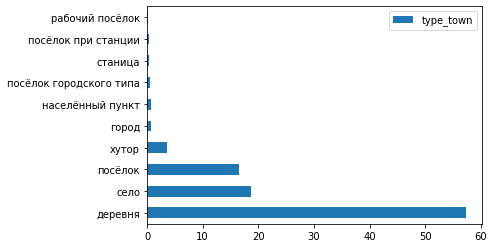

In [15]:
segment.head(10).to_frame().plot.barh()

In [35]:
df[(df['type_town'] == 'обгонный пункт') | (df['type_town'] == 'железнодорожная площадка') | (df['type_town'] == 'высел')][['region_name', 'type_town', 'clear_name']].sort_values(by='type_town')

,region_name,type_town,clear_name
67721,Чувашская Республика — Чувашия,высел,Новые Мамеи
16431,Липецкая область,железнодорожная площадка,Беляево
105682,Новосибирская область,обгонный пункт,Чебачий


In [36]:
df['population'] = df['population'].astype('int64')
df.groupby('type_town')['population'].sum().sort_values(ascending=False)

type_town
город                                  103010310
село                                    21789657
посёлок                                  8502200
деревня                                  6557981
посёлок городского типа                  4946728
рабочий посёлок                          2438326
станица                                  2154630
хутор                                    1292738
аул                                       215741
дачный посёлок                            125799
посёлок при станции                       119447
слобода                                    93278
улус                                       82549
железнодорожная станция                    71850
станция                                    50058
населённый пункт                           45069
аал                                        14410
посёлок сельского типа                     11631
местечко                                   10071
курортный посёлок                           9209
кутан     

<AxesSubplot:ylabel='type_town'>

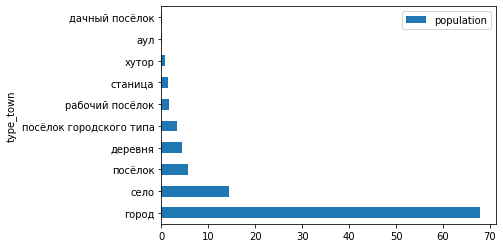

In [37]:
population_type_town = df.groupby('type_town')['population'].sum().sort_values(ascending=False) / df['population'].sum() * 100
population_type_town.head(10)
population_type_town.head(10).to_frame().plot.barh()

## Пункт 5

In [38]:
df['clear_name'].value_counts().head(10)

Александровка    331
Ивановка         280
Михайловка       267
Каменка          252
Никольское       240
Николаевка       238
Березовка        233
Сосновка         216
Первомайский     202
Заречье          198
Name: clear_name, dtype: int64

<AxesSubplot:>

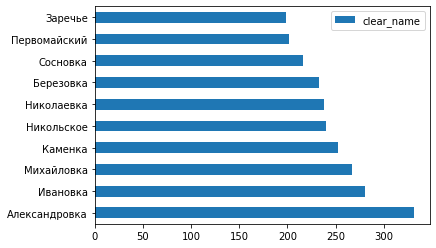

In [39]:
df['clear_name'].value_counts().head(10).to_frame().plot.barh()

## Пункт 6

In [40]:
df.loc[df['clear_name'].str.len() == 2]

,name,other_name,region_name,district,lon,lat,population,approx,type_town,clear_name
7238,деревня Ям,NaN,Калужская область,Тарусский муниципальный район,36.896976,54.714127,11,0.0,деревня,Ям
23228,деревня Ур,NaN,Рязанская область,Путятинский муниципальный район,41.403556,54.023422,10,0.0,деревня,Ур
33548,деревня Ям,NaN,Тверская область,Торжокский муниципальный район,34.479036,57.190680,10,0.0,деревня,Ям
37987,деревня Ям,NaN,Тверская область,Краснохолмский муниципальный округ,37.266299,58.023187,10,0.0,деревня,Ям
41404,деревня Ям,NaN,Владимирская область,Александровский муниципальный район,38.455827,56.641663,30,0.0,деревня,Ям
...,...,...,...,...,...,...,...,...,...,...
149416,хутор Ея,NaN,Краснодарский край,Крыловский муниципальный район,40.178302,46.290429,120,0.0,хутор,Ея
149439,хутор Ея,NaN,Краснодарский край,Новопокровский муниципальный район,40.614270,45.994483,50,0.0,хутор,Ея
157093,село Ир,Джейрхой-Юрт; село Ир-Восход,Республика Северная Осетия — Алания,Пригородный муниципальный район,44.740231,43.066852,3672,0.0,село,Ир
159578,село Гу,Гув,Республика Ингушетия,Джейрахский муниципальный район,44.823001,42.801492,0,0.0,село,Гу


<AxesSubplot:>

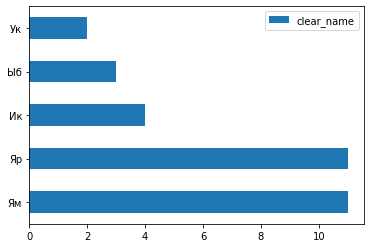

In [41]:
result_df['clear_name'].value_counts().head(5).to_frame().plot.barh()

In [42]:
df[(df['clear_name'] == 'Ям') | (df['clear_name'] == 'Яр') | (df['clear_name'] == 'Ик') | (df['clear_name'] == 'Ыб') | (df['clear_name'] == 'Ук')][['region_name','clear_name']].sort_values(by='clear_name')

,region_name,clear_name
107067,Омская область,Ик
144032,Курганская область,Ик
91216,Республика Татарстан (Татарстан),Ик
65642,Республика Башкортостан,Ик
143412,Челябинская область,Ук
101143,Иркутская область,Ук
130691,Республика Коми,Ыб
130439,Республика Коми,Ыб
130400,Республика Коми,Ыб
129682,Псковская область,Ям


In [43]:
df.loc[df['clear_name'].str.len() == 3]

,name,other_name,region_name,district,lon,lat,population,approx,type_town,clear_name
1454,село Весёлое,NaN,Белгородская область,Красногвардейский муниципальный район,38.156629,50.632756,2300,0.0,село,Вее
2460,посёлок Май,1-е Мая,Брянская область,Стародубский муниципальный округ,32.449911,52.655707,30,0.0,посёлок,Май
2750,деревня Ужа,NaN,Брянская область,Трубчевский муниципальный район,33.562889,52.605455,380,0.0,деревня,Ужа
3371,населенный пункт КИМ,NaN,Брянская область,Жуковский муниципальный округ,33.826823,53.723582,4,1.0,населённый пункт,КИМ
3515,населенный пункт Май,NaN,Брянская область,Дубровский муниципальный район,33.421651,53.477858,4,1.0,населённый пункт,Май
...,...,...,...,...,...,...,...,...,...,...
159257,железнодорожный разъезд 299,посёлок Ингеловский; железнодорожный разъезд И...,Волгоградская область,Палласовский муниципальный район,46.840250,49.263671,28,0.0,железнодорожный разъезд,299
159381,деревня Бор,NaN,Архангельская область,Няндомский муниципальный район,40.863509,61.783414,0,0.0,деревня,Бор
159476,село Хой,NaN,Чеченская Республика,Веденский муниципальный район,46.133394,42.756628,50,0.0,село,Хой
159505,посёлок Лая,NaN,Свердловская область,Горноуральский городской округ,59.861942,58.048797,214,0.0,посёлок,Лая


<AxesSubplot:>

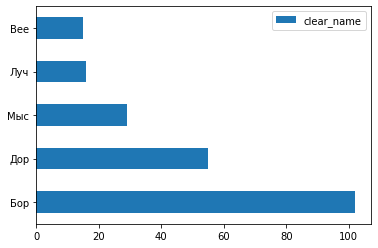

In [44]:
result_df_3['clear_name'].value_counts().head(5).to_frame().plot.barh()

In [45]:
df[(df['clear_name'] == 'Бор') | (df['clear_name'] == 'Дор') | (df['clear_name'] == 'Мыс') | (df['clear_name'] == 'Луч') | (df['clear_name'] == 'Вее')][['region_name','clear_name']].sort_values(by='clear_name')

,region_name,clear_name
116537,Архангельская область,Бор
119441,Новгородская область,Бор
119773,Новгородская область,Бор
119846,Новгородская область,Бор
120073,Новгородская область,Бор
...,...,...
24582,Смоленская область,Мыс
137557,Вологодская область,Мыс
138386,Вологодская область,Мыс
135650,Вологодская область,Мыс


## Пункт 7

In [46]:
new_df = df[(df['clear_name'].str.find(' ') == -1) & (df['clear_name'].str.find('-') == -1)]
ans = max(new_df['clear_name'].str.len())
new_df[new_df['clear_name'].str.len() == ans]

,name,other_name,region_name,district,lon,lat,population,approx,type_town,clear_name
82070,село Верхненовокутлумбетьево,NaN,Оренбургская область,Матвеевский муниципальный район,53.770268,53.248018,310,0.0,село,Верхненовокутлумбетьево


## Пункт 8

In [47]:
len(df[df['clear_name'].str[0] == "Ы"])

22

In [48]:
df['clear_name'].str[0].value_counts().to_frame().head(10)

,clear_name
К,19501
С,14986
П,13039
Б,12526
М,11398
Н,9680
В,8450
Г,6359
Т,6326
А,6266


<AxesSubplot:>

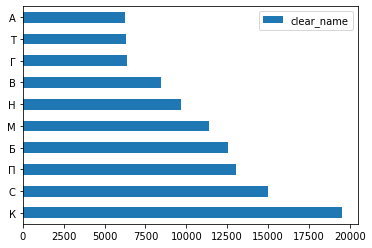

In [49]:
df['clear_name'].str[0].value_counts().to_frame().head(10).plot.barh()

## Пункт 9

In [52]:
research_df = df['clear_name'].str.lower()
print('Красный :', len(df[research_df.str.find('красный') != -1]) + len(df[research_df.str.find('красная') != -1]) + len(df[research_df.str.find('красное') != -1]) + len(df[research_df.str.find('красные') != -1]))

print('Большой: ', len(df[research_df.str.find('большой') != -1]) + len(df[research_df.str.find('большая') != -1]) + len(df[research_df.str.find('большое') != -1]) + len(df[research_df.str.find('большие') != -1]))

print('Малый: ', len(df[research_df.str.find('малый') != -1]) + len(df[research_df.str.find('малая') != -1]) + len(df[research_df.str.find('малое') != -1]) + len(df[research_df.str.find('малые') != -1]))

print('Новый: ', len(df[research_df.str.find('новый') != -1]) + len(df[research_df.str.find('новая') != -1]) + len(df[research_df.str.find('новое') != -1]) + len(df[research_df.str.find('новые') != -1]))

Красный : 1447
Большой:  2089
Малый:  1842
Новый:  2149


## Пункт 10

In [32]:
df[df['clear_name'].str.find('Каравай') != -1]

,name,other_name,region_name,district,lon,lat,population,approx,type_town,clear_name
6966,деревня Каравай,NaN,Калужская область,Дзержинский муниципальный район,36.032965,54.655765,159,0.0,деревня,Каравай
34660,деревня Каравайцево,NaN,Тверская область,Кувшиновский муниципальный район,34.289379,56.903190,50,0.0,деревня,Каравайцево
49146,деревня Каравайцево,NaN,Ярославская область,Угличский муниципальный район,38.418973,57.143924,4,1.0,деревня,Каравайцево
73119,деревня Каравайково,NaN,Кировская область,Лузский муниципальный округ,47.160528,60.624333,210,0.0,деревня,Каравайково
79861,деревня Каравайки,NaN,Нижегородская область,городской округ Семёновский,44.263819,56.691258,4,1.0,деревня,Каравайки
80199,деревня Каравайки,NaN,Нижегородская область,Городецкий муниципальный район,43.887801,56.561132,4,1.0,деревня,Каравайки
94643,деревня Каравай,NaN,Удмуртская Республика,муниципальный округ Якшур-Бодьинский район,52.605780,57.372883,27,0.0,деревня,Каравай
95213,деревня Каравай-Норья,NaN,Удмуртская Республика,муниципальный округ Завьяловский район,53.021956,56.686185,40,0.0,деревня,Каравай-Норья
119709,населенный пункт Лесничество Каравайна,NaN,Новгородская область,Пестовский муниципальный район,35.816852,58.722695,4,1.0,населённый пункт,Лесничество Каравайна
125941,поселок Каравай,NaN,Псковская область,Бежаницкий муниципальный район,29.883596,57.378296,4,1.0,посёлок,Каравай


In [50]:
df[df['clear_name'].str.find('Лисица') != -1]

,name,other_name,region_name,district,lon,lat,population,approx,type_town,clear_name
87,село Ивановская Лисица,NaN,Белгородская область,Грайворонский городской округ,35.701127,50.593588,690,0.0,село,Ивановская Лисица
1492,село Казачья Лисица,Казачья Степь,Белгородская область,Грайворонский городской округ,35.739270,50.620081,380,0.0,село,Казачья Лисица
19035,деревня Лисица,NaN,Орловская область,Мценский муниципальный район,36.342883,53.175207,14,0.0,деревня,Лисица
108142,поселок Лисица,NaN,Томская область,Верхнекетский муниципальный район,85.224694,58.700426,490,0.0,посёлок,Лисица


In [51]:
df[df['clear_name'].str.find('Сарай') != -1].iloc[-1]

name                           поселок Сарай
other_name                               NaN
region_name            Волгоградская область
district       Ленинский муниципальный район
lon                                45.383913
lat                                48.669718
population                               100
approx                                   0.0
type_town                            посёлок
clear_name                             Сарай
Name: 154419, dtype: object